# Empirical modelling of survival data in a large mechanical assembly

A particular mechanical assembly is comprised of a large number of components, each dedicated to one and only one task, $C_1, C_2$ or $C_3$. There are 73 type-$C_1$ components are on test, as well as 50 type-$C_2$ components, and 22 type-$C_3$ components. These number are known to be in proportion to the actual number of each type of device in the assembly. At the end of every six months, a record is taken of the number of each type of test components still functioning. These statistics are gathered for 12 years (i.e. 24 records), and stored in a $24 \times 3$ matrix named **mechanical.mat**.

In [1]:
import scipy.io as sio
import numpy as np
data = sio.loadmat('mechanical.mat')

# component survival data
comp_data = data['mechanical']

# Add initial number of components
comp_data = np.insert(comp_data, 0, [73, 50, 22], axis = 0)
comp_data = np.int64(comp_data)

Let's first visualize the given survival data given for each type of component using a bar plot.

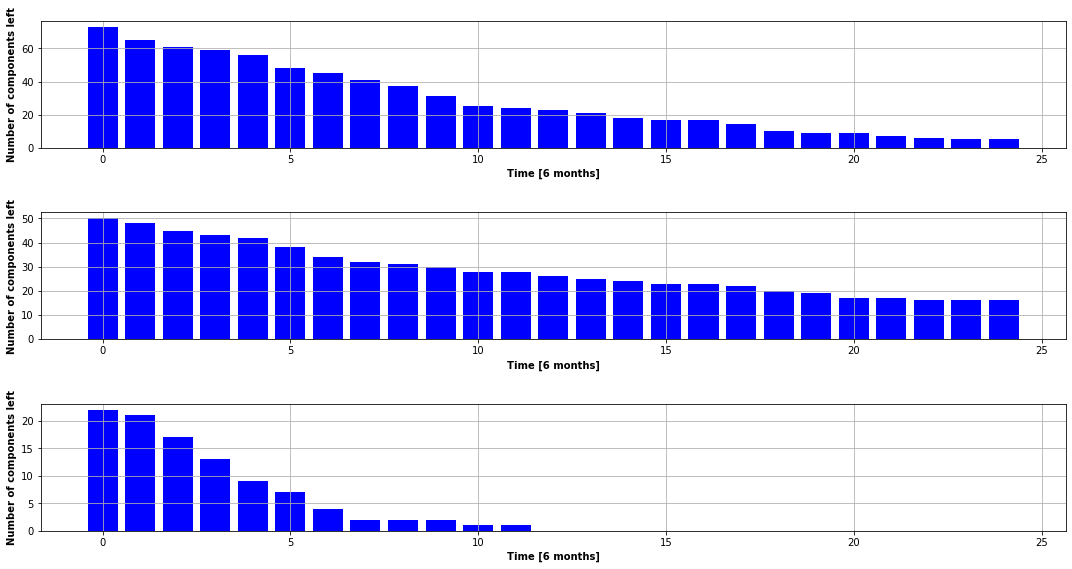

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = [15, 8])

x = np.arange(0, 25)
for i in range(3):
    ax = fig.add_subplot(3, 1, i + 1)
    ax.bar(x, comp_data[:, i], color = 'b')
    ax.set_xlabel('Time [6 months]', fontweight = 'bold')
    ax.set_ylabel('Number of components left', fontweight = 'bold')
    ax.grid(True)
fig.tight_layout(w_pad = 2, h_pad = 2)


We can see that, after $11^{th}$ 6-months period there are no $C3$-type component left. 

Next, another statistic we are interested in is the number of component which are failing in each 6 months. We can get this by finding the difference between consecutive rows of comp_data.  

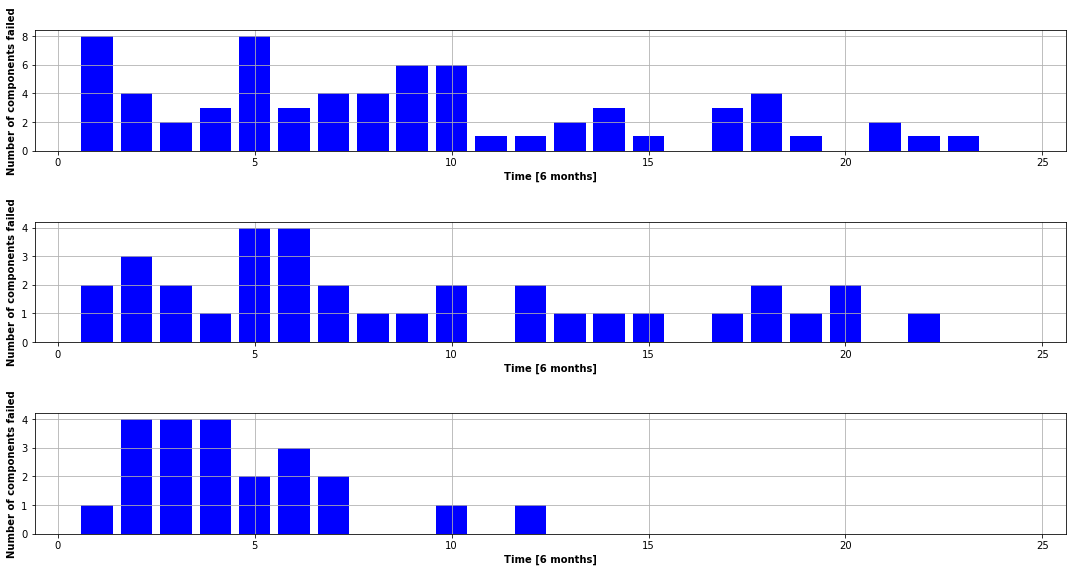

In [3]:
fail_times = -np.diff(comp_data, axis = 0)

x = np.arange(1, 25)

fig = plt.figure(figsize = [15, 8])

for i in range(3):
    ax = fig.add_subplot(3, 1, i + 1)
    ax.bar(x, fail_times[:, i], color = 'b')
    ax.set_xlabel('Time [6 months]', fontweight = 'bold')
    ax.set_ylabel('Number of components failed', fontweight = 'bold')
    ax.grid(True)
fig.tight_layout(w_pad = 2, h_pad = 2)

Let's see how many total components of each type fail. 

In [4]:
total_fail_components = np.sum(fail_times, axis = 0)

print("The total number of failed component of each type are {}".format(total_fail_components))

The total number of failed component of each type are [68 34 22]


We can see that, all 68 components of $C_1$-type, 34 components of $C_2$-type and all components of $C_3$-type fail by the end of $24^{th}$ 6-month interval. To complete the statistic, we add a $25^{th}$ row which signifies the number of components which fail in $25^{th}$ 6-month interval or after.

In [5]:
fail_times = np.append(fail_times, [comp_data[0, :] - total_fail_components], axis = 0)

Now, we as mechanical engineers, want to use these statistics to inform outr beliefs about future lifetime testing of components selected from assemblies of the kind under test. 

Let $C\in \{C_1, C_2, C_3\}$ denote the type of one such component, randomly selected from such as assembly. Let $I = k, \ k \in \{1, 2, 3 ...\}$ denote the 6-month interval in which this component will fail and $T$ denote the unknown time to failure (a continuous random variable measured in months) of the component. 

First, let's specify the relationship between $T$  and $I$. If a component fails in 15.2 months and 7.4 months, then we know that the 6-month interval in which it failed is $\text{3}^{rd}$ and $\text{2}^{nd}$. So we have a clear relationship between the random variable $T$ and $I$.

$$I = \lfloor \frac{T}{6} \rfloor + 1$$

Next, we want to illustrate the marginal probability mass function of $C$. As per the definition of $C$, it is the component type when we choose a component at random from the assembly, so the marginal probability $p_i$ of this component to be $C_i$-type is 

$$\text{Pr}[C_i] = \frac{\text{Total number of $C_i$-type component}}{\text{Total number of all components}}$$

So the marginal probability mass function of $C$ is given as 
    

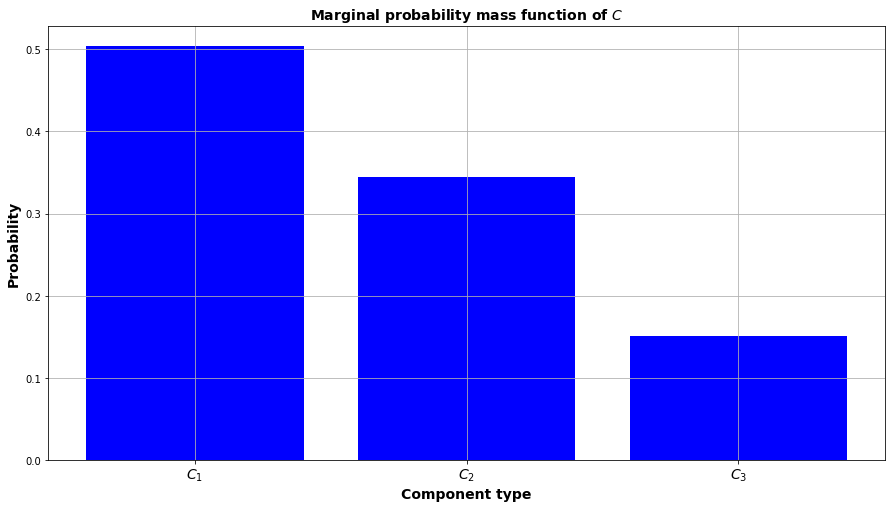

In [6]:
marginal_pmf_C = comp_data[0, :]/np.sum(comp_data[0, :])

x = [1, 2, 3]
fig = plt.figure(figsize = [15, 8])
ax = fig.add_subplot(111) 
ax.bar(x, marginal_pmf_C,  color = 'b')
ax.set_xlabel('Component type', fontweight = 'bold', fontsize = 14)
ax.set_ylabel('Probability', fontweight = 'bold', fontsize = 14)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['$C_1$', '$C_2$', '$C_3$'], {'fontweight' : 'bold', 'fontsize' : 14})
ax.set_title('Marginal probability mass function of $C$', fontweight = 'bold', fontsize = 14)
ax.grid(True)

Our next task is to illustrate the joint probability mass function of $C$ and $I$. First we should understand what does the joint probability of $C$ and $I$ mean. The joint probability value of $C$ and $I$ will tell that the random chosen component belong to which type ($C$) **and** in which 6-month interval it is going to fail (I). Focus on **and** in previous statement.

We are intersted in $\text{Pr}(C \cap I)$. We know the following relaionship

$$\text{Pr}(C \cap I) = \text{Pr}(C)\times \text{Pr(I|C)}$$

We already have the $\text{Pr}(C)$ from the marginal pmf of $C$. We need to find the $\text{Pr(I|C)}$. Let's look whaat does it mean. $\text{Pr(I|C)}$ is the conditional probability of failing of component in certain 6-months iterval if the compoenent typr is known, i.e. the random component we chose from the assembly, we know its type and we want to find the probability of it failing in certain 6-month interval. 

Now imagine that the random component we chose from assembly belonged to $C_1$-type, probability of it failing in certain 6-months will be given by 

$$\text{Pr}(I|C_1) = \frac{\text{fail-times of component of type-$C_1$}}{\text{Total number of components of type-$C_1$}}$$

In [7]:
conditional_pmf_I_given_C = fail_times/comp_data[0, :]


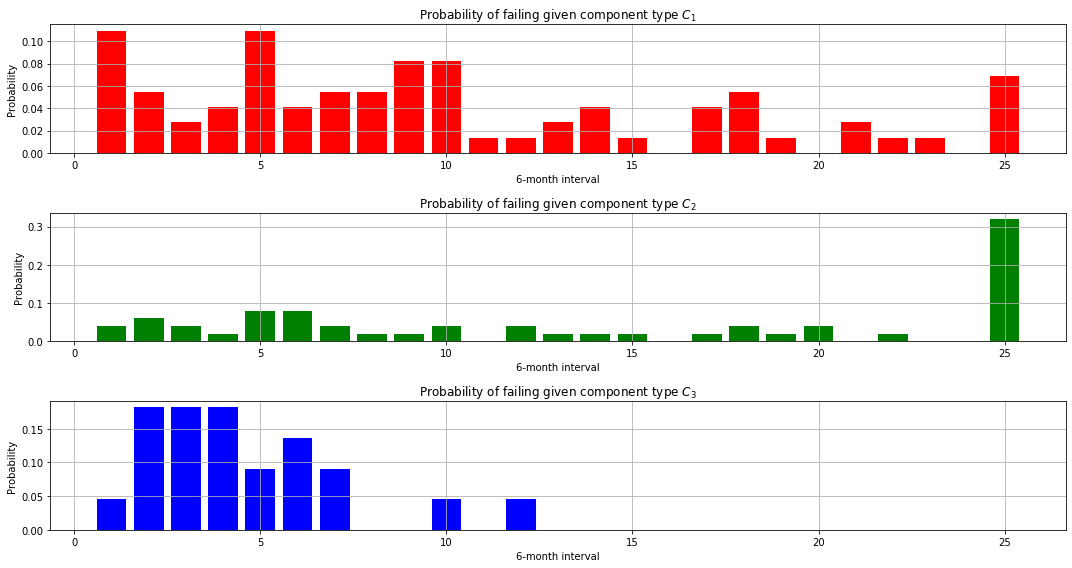

In [8]:
fig = plt.figure(figsize = [15, 8])

color = ['r', 'g', 'b']

x = np.arange(1, 26)

for i in range(3):
    ax = fig.add_subplot(3, 1, i + 1)
    ax.bar(x, conditional_pmf_I_given_C[:, i], color = color[i])
    ax.grid(True)
    ax.set_xlabel("6-month interval")
    ax.set_ylabel("Probability")
    ax.set_title("Probability of failing given component type $C_{}$".format(i + 1))
fig.tight_layout()

Those spikes at the end in first and second figure represent the components failing after $24^{th}$ 6-months period.

Now we know the $\text{Pr}(C)$ and $\text{Pr}(I|C)$, we can find the joint proability distribution of $C$ and $I$ as follows

In [9]:
joint_pmf_CI = conditional_pmf_I_given_C*marginal_pmf_C


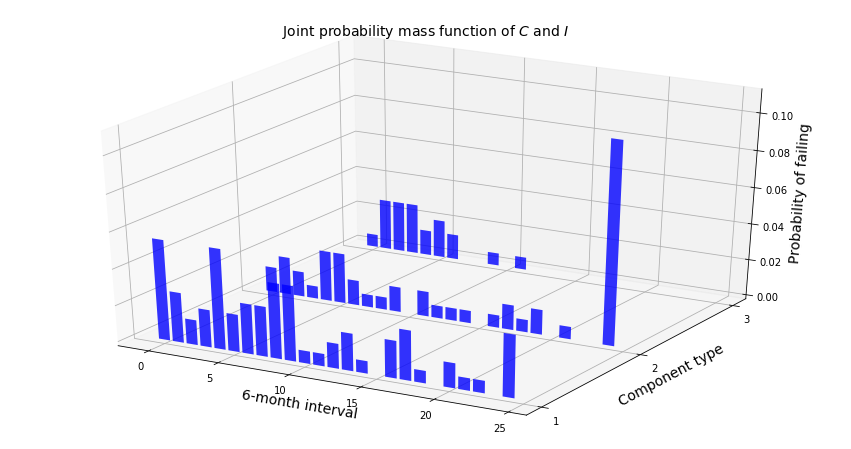

In [10]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = [15, 8])
ax = fig.add_subplot(111, projection='3d')

yticks = [1, 2, 3]
for k in yticks:
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(25)
    ys = joint_pmf_CI[:, k - 1]

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color='b', alpha=0.8)
                
ax.set_xlabel('6-month interval', fontsize = 14)
ax.set_ylabel('Component type', fontsize = 14)
ax.set_zlabel('Probability of failing', fontsize = 14)

# On the y axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)
ax.set_title("Joint probability mass function of $C$ and $I$", fontsize = 14)
plt.show()

Next, we can find the marginal probabilit mass function of $I$. The marginal probability of $I$ represent the probability of component failing in a certain 6-month interval regardless of the component type. So, we can find the probability of component failing in certain 6-month interval by adding all the component numbers in each 6-month interval and then divide by total number of components

$$\text{Pr}(I = i) = \frac{\text{Total number of component failing in $i^{th}$ 6-month interval }}{\text{Total number of components}}$$

In [11]:
marginal_pmf_I = np.sum(fail_times, axis = 1)/np.sum(comp_data[:, 0])

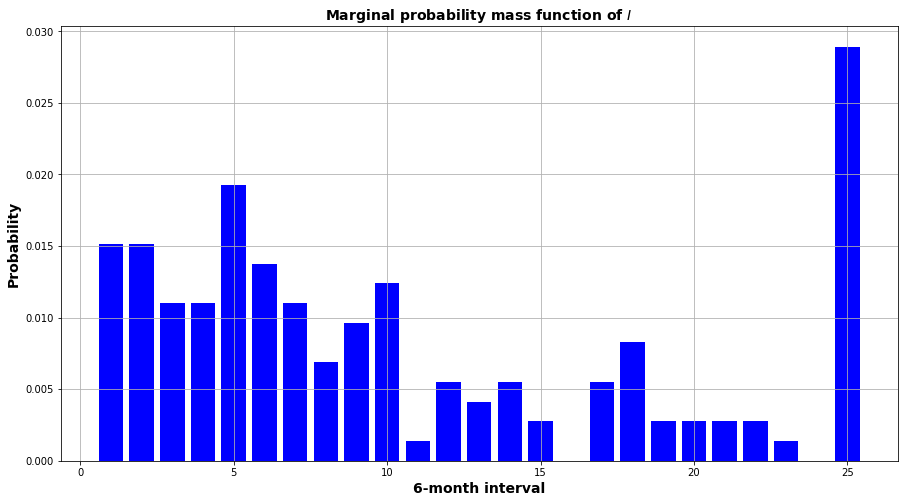

In [12]:
x = np.arange(1, 26)

fig = plt.figure(figsize = [15, 8])
ax = fig.add_subplot(111) 
ax.bar(x, marginal_pmf_I,  color = 'b')
ax.set_xlabel('6-month interval', fontweight = 'bold', fontsize = 14)
ax.set_ylabel('Probability', fontweight = 'bold', fontsize = 14)
ax.set_title('Marginal probability mass function of $I$', fontweight = 'bold', fontsize = 14)
ax.grid(True)